In [ ]:
import torch
import torch.nn as nn
from importlib.metadata import version


In [ ]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
print(inputs.shape)

torch.Size([6, 3])


In [ ]:
query = inputs[1]  #2nd input is the query

att_score_2 = torch.empty(inputs.shape[0])
for i , x_i in enumerate(inputs):
  att_score_2[i] = torch.dot(x_i, query) # Dot product
print(att_score_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [ ]:
res = 0
for idx , element in enumerate(inputs[0]):
  res += inputs[0][idx] * query[idx]
print(res)


In [ ]:
att_score_2 = att_score_2/att_score_2.sum()   # Normalizing the Attention Scores
print(att_score_2)

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])


In practice, it's more common and advisable to use the softmax function for normalization.
This approach is better at managing extreme values and offers more favorable gradient
properties during training. Below is a basic implementation of the softmax function for
normalizing the attention scores:


In [ ]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(dim = 0)

att_score_2  = softmax(att_score_2)
print(att_score_2)

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


In [ ]:
att_score_softmax = torch.softmax(att_score_2, dim = 0)
print(att_score_softmax)

tensor([0.1630, 0.1770, 0.1765, 0.1603, 0.1570, 0.1663])


In [ ]:
query = inputs[1]
context_vec = torch.zeros(query.shape)
for i , x_i in enumerate(inputs):
  context_vec += att_score_softmax[i] * x_i

print(context_vec)

tensor([0.4325, 0.5937, 0.5349])


In [ ]:
att_scores = torch.empty(6,6)
for i , x_i in enumerate(inputs):
  for j , x_j in enumerate(inputs):
    att_scores[i,j] = torch.dot(x_i, x_j)
print(att_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
att_weights = torch.softmax(att_scores, dim = -1)
print(att_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [ ]:
all_context_vecs = att_weights @ inputs
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [ ]:
x_2 = inputs[1]
in_dim = inputs.shape[1]
out_dim = 2

In [ ]:
in_dim

3

In [ ]:
torch.manual_seed(123)
w_query = torch.nn.Parameter(torch.rand(in_dim, out_dim), requires_grad = False)
w_key = torch.nn.Parameter(torch.rand(in_dim, out_dim), requires_grad = False)
w_value = torch.nn.Parameter(torch.rand(in_dim, out_dim), requires_grad = False)

In [ ]:
query_2 = x_2 @ w_query
key_2 = x_2 @ w_key
value_2 = x_2 @ w_value
print(key_2)

tensor([0.4433, 1.1419])


Even though our temporary goal is to only compute the one context vector, z
(2)
, we still
require the key and value vectors for all input elements as they are involved in computing
the attention weights with respect to the query q
(2)
, as illustrated in Figure 3.14.

In [ ]:
key = inputs @ w_key
value = inputs @ w_value
print(key.shape, value.shape)
# print(key.T.shape)

torch.Size([6, 2]) torch.Size([6, 2])
torch.Size([2, 6])


In [ ]:
keys_2 = key[2]
att_2 = query_2.dot(keys_2)
print(att_2)

tensor(1.8111)


In [ ]:
att_2 = query_2 @ key.T
print(att_2)

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [ ]:
print(query_2)

tensor([0.4306, 1.4551])


In [ ]:
d_k = key.shape[-1]
attention_weights = torch.softmax(att_2/d_k**0.5, dim = -1)
print(attention_weights)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


In [ ]:
context_vecs  = attention_weights @ value
print(context_vecs)

tensor([0.3061, 0.8210])


Implementing a compact self-attention Python class

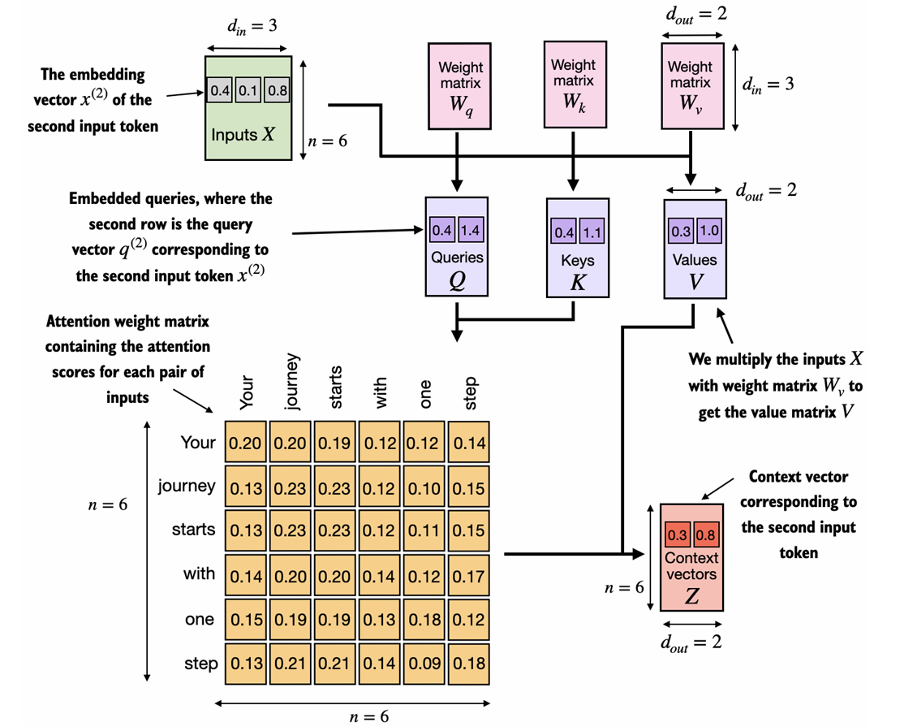

In [ ]:
class Attention(nn.Module):
  def __init__(self, d_in, d_out):
    super().__init__()
    self.d_out = d_out
    self.w_query = nn.Parameter(torch.rand(d_in, d_out))
    self.w_key = nn.Parameter(torch.rand(d_in, d_out))
    self.w_value = nn.Parameter(torch.rand(d_in, d_out))


  def forward(self, x):
    keys = x @ self.w_key
    value = x @ self.w_value
    query = x @ self.w_query
    attention_scores = query @ keys .T
    attention_weights = torch.softmax(attention_scores/keys.shape[-1]**0.5, dim = -1)
    context_vecs =  attention_weights @ value
    return context_vecs

In [ ]:
torch.manual_seed(123)
atten = Attention(in_dim, out_dim)
print(atten(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [ ]:
class Attentionv2(nn.Module):
  def __init__(self, d_in, d_out,qkv_bias=False):
    super().__init__()
    self.d_out = d_out
    self.w_query = nn.Linear(d_in, d_out,bias = qkv_bias)
    self.w_key = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.w_value = nn.Linear(d_in, d_out, bias = qkv_bias)

  def forward(self, x):
    keys = self.w_key(x)
    value = self.w_value(x)
    query = self.w_query(x)
    attention_scores = query @ keys .T
    attention_weights = torch.softmax(attention_scores/keys.shape[-1]**0.5, dim = -1)
    context_vecs =  attention_weights @ value
    return context_vecs

In [ ]:
torch.manual_seed(123)
atten1 = Attentionv2(in_dim, out_dim)
print(atten1(inputs))

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)


We are Transfering the Weight Matrices From V1 to V2 as both uses different weight intialization which lead to different context vecs so we are using the same weight to produce the same results


In [ ]:
class Attention(nn.Module):
  def __init__(self, d_in, d_out):
    super().__init__()
    self.d_out = d_out
    self.w_query = torch.nn.Parameter(atten1.w_query.weight .T)
    self.w_key = torch.nn.Parameter(atten1.w_key.weight .T)
    self.w_value = torch.nn.Parameter(atten1.w_value.weight .T)


  def forward(self, x):
    keys = x @ self.w_key
    value = x @ self.w_value
    query = x @ self.w_query
    attention_scores = query @ keys .T
    attention_weights = torch.softmax(attention_scores/keys.shape[-1]**0.5, dim = -1)
    context_vecs =  attention_weights @ value
    return context_vecs

In [ ]:
torch.manual_seed(123)
atten2 = Attention(in_dim, out_dim)
print(atten1(inputs))

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)


In [ ]:
atten2 = atten1.w_query.weight

**Causal attention, also known as masked attention, is a specialized form of self-attention.
 It restricts a model to only consider previous and current inputs in a sequence when
 processing any given token.**

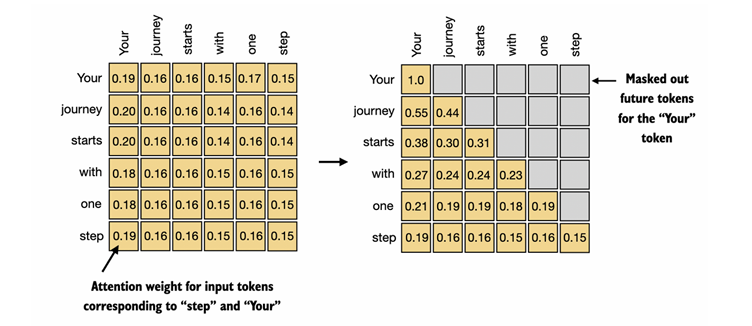

In [ ]:
queries = atten1.w_query(inputs)
keys = atten1.w_key(inputs)
attention_scores = queries @ keys .T
attention_weights = torch.softmax(attention_scores/keys.shape[-1]**0.5, dim = 1)
print(attention_weights)

tensor([[0.1717, 0.1762, 0.1761, 0.1555, 0.1627, 0.1579],
        [0.1636, 0.1749, 0.1746, 0.1612, 0.1605, 0.1652],
        [0.1637, 0.1749, 0.1746, 0.1611, 0.1606, 0.1651],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.1632, 0.1674],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.1639],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<SoftmaxBackward0>)


using PyTorch's tril function to create a mask
 where the values above the diagonal are zero

In [ ]:
context_length = attention_scores.shape[0]
# print(context_length)
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

6
tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [ ]:
masked_simple = attention_weights * mask_simple
print(masked_simple)

tensor([[0.1717, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1749, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1637, 0.1749, 0.1746, 0.0000, 0.0000, 0.0000],
        [0.1636, 0.1704, 0.1702, 0.1652, 0.0000, 0.0000],
        [0.1667, 0.1722, 0.1721, 0.1618, 0.1633, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<MulBackward0>)


In [ ]:
row_sums = masked_simple.sum(dim = 1, keepdim= True)
masked_simple_norm = masked_simple/row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4833, 0.5167, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3190, 0.3408, 0.3402, 0.0000, 0.0000, 0.0000],
        [0.2445, 0.2545, 0.2542, 0.2468, 0.0000, 0.0000],
        [0.1994, 0.2060, 0.2058, 0.1935, 0.1953, 0.0000],
        [0.1624, 0.1709, 0.1706, 0.1654, 0.1625, 0.1682]],
       grad_fn=<DivBackward0>)


In [ ]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal = 1)
masked = attention_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.3111,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1655, 0.2602,   -inf,   -inf,   -inf,   -inf],
        [0.1667, 0.2602, 0.2577,   -inf,   -inf,   -inf],
        [0.0510, 0.1080, 0.1064, 0.0643,   -inf,   -inf],
        [0.1415, 0.1875, 0.1863, 0.0987, 0.1121,   -inf],
        [0.0476, 0.1192, 0.1171, 0.0731, 0.0477, 0.0966]],
       grad_fn=<MaskedFillBackward0>)


In [ ]:
masked = torch.softmax(masked/keys.shape[-1], dim = 1)
print(masked)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4882, 0.5118, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3232, 0.3386, 0.3382, 0.0000, 0.0000, 0.0000],
        [0.2461, 0.2532, 0.2530, 0.2477, 0.0000, 0.0000],
        [0.1996, 0.2042, 0.2041, 0.1954, 0.1967, 0.0000],
        [0.1637, 0.1696, 0.1695, 0.1658, 0.1637, 0.1677]],
       grad_fn=<SoftmaxBackward0>)


In [ ]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [ ]:
print(dropout(masked))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6773, 0.6764, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.5060, 0.4955, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3934, 0.0000],
        [0.3274, 0.3393, 0.0000, 0.3316, 0.3274, 0.3355]],
       grad_fn=<MulBackward0>)


In [ ]:
batch = torch.stack((inputs, inputs), dim=0)
print(inputs.shape, batch.shape)

torch.Size([6, 3]) torch.Size([2, 6, 3])


In [ ]:
class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length,
                 dropout, qkv_bias=False):
        super().__init__()
        self.d_out = d_out
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout) # New
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # New

    def forward(self, x):
        b, num_tokens, d_in = x.shape
        # print(b, num_tokens, d_in)

        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)

        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec

torch.manual_seed(123)

context_length = batch.shape[1]
in_dim = 3
out_dim = 1
ca = CausalAttention(in_dim, out_dim, context_length, 0.0)

context_vecs = ca(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.5740],
         [-0.7320],
         [-0.7774],
         [-0.6979],
         [-0.6538],
         [-0.6424]],

        [[-0.5740],
         [-0.7320],
         [-0.7774],
         [-0.6979],
         [-0.6538],
         [-0.6424]]], grad_fn=<UnsafeViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 1])


In [ ]:
class MultiHead(nn.Module):
  def __init__(self, in_dim, out_dims, context_length, dropout, num_heads, qkv_bias = False):
    super().__init__()
    self.heads = nn.ModuleList([CausalAttention(in_dim, out_dim, context_length , dropout, qkv_bias)
    for _ in range(num_heads)])

  def forward(self, x):
    return torch.cat([head(x) for head in self.heads], dim = -1)


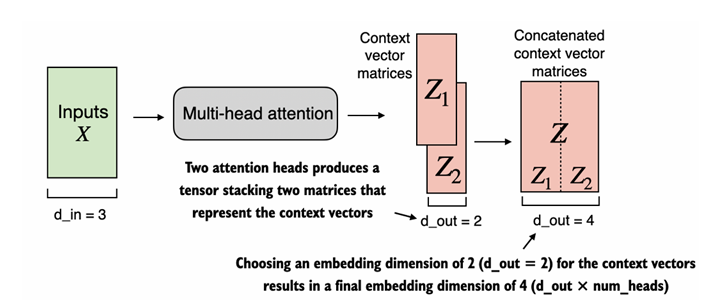

In [ ]:
torch.manual_seed(123)
context_length = batch.shape[1]
mha = MultiHead(in_dim,out_dim,context_length , 0.0, num_heads = 2)
context_vecs = mha(batch)
print(context_vecs.shape)

torch.Size([2, 6, 2])


In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)


        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)


        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)


        attn_scores = queries @ keys.transpose(2, 3)


        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]


        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)


        context_vec = (attn_weights @ values).transpose(1, 2)


        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)

        return context_vec

torch.manual_seed(123)

batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)

context_vecs = mha(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [ ]:
context_length = 1024
d_in = 768
d_out = 768
num_heads = 12
mha = MultiHeadAttention(d_in, d_out, context_length ,0.0, num_heads)
context_vecs = mha(batch)
print(context_vecs.shape)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(count_parameters(mha))


torch.Size([2, 1024, 768])
2360064


In [ ]:
inputs = torch.randn(1024,768)
print(inputs.shape)

torch.Size([1024, 768])


In [ ]:
batch= torch.stack((inputs, inputs),dim = 0)
print(batch.shape)

torch.Size([2, 1024, 768])
